In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init(ip ='localhost', port = 54321)

Checking whether there is an H2O instance running at http://localhost:54321 ..... connected.


H2O_cluster_uptime:,6 hours 58 mins
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_simenvoldqvam_9hznas
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,540 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
#importing stores_train
stores_train = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_train.csv')
stores_train = stores_train[stores_train['year']==2016]



#importing stores_test
stores_test = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_test.csv')
stores_test = stores_test[stores_test['year']==2016]
stores_test_new = stores_test.drop(['year'],axis=1)

#importing stores_extra
stores_extra = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_extra.csv')
stores_extra = stores_extra[stores_extra['year']==2016]


#importing grunnkrets_age_distribution
grunnkrets_age_distribution = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_age_distribution.csv")
grunnkrets_age_distribution = grunnkrets_age_distribution[grunnkrets_age_distribution['year']==2016]
grunnkrets_age_distribution_new = grunnkrets_age_distribution.drop(['year'],axis=1)

#importing grunnkrets_norway_stripped
grunnkrets_norway_stripped = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_norway_stripped.csv")
grunnkrets_norway_stripped = grunnkrets_norway_stripped[grunnkrets_norway_stripped['year']==2016]
grunnkrets_norway_stripped_new = grunnkrets_norway_stripped.drop(['year'],axis=1)

#importing grunnkrets_households_num_persons
grunnkrets_households_num_persons = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_households_num_persons.csv")
grunnkrets_households_num_persons = grunnkrets_households_num_persons[grunnkrets_households_num_persons['year']==2016]
grunnkrets_households_num_persons_new = grunnkrets_households_num_persons.drop(['year'],axis=1)

#importing grunnkrets_income_households
grunnkrets_income_households = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_income_households.csv")
grunnkrets_income_households = grunnkrets_income_households[grunnkrets_income_households['year']==2016]
grunnkrets_income_households_new = grunnkrets_income_households.drop(['year'],axis=1)

#importing plaace_hierarchy
plaace_hierarchy = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/plaace_hierarchy.csv")


grunnkrets_norway_stripped

,grunnkrets_id,year,grunnkrets_name,district_name,municipality_name,geometry,area_km2
260,10010507,2016,Fidjane-Vestheiene,Hellemyr-Fjellro,Kristiansand,MULTIPOLYGON(((7.93581993399791 58.14261844480...,0.158484
261,10011105,2016,Gimlekollen vest,Kongsgård øvre-Gimlekollen,Kristiansand,MULTIPOLYGON(((8.02862690742917 58.17389896051...,0.474242
262,10011604,2016,Ryen,Tveit,Kristiansand,"POLYGON((8.10303607445248 58.2119345268037, 8....",1.464307
263,10011703,2016,Hånes vest,Hånes-Timenes,Kristiansand,"POLYGON((8.08896547903471 58.1756869597767, 8....",0.484497
264,10011707,2016,Hånes Nord-Bjørndalen,Hånes-Timenes,Kristiansand,"POLYGON((8.09775611761549 58.1741474661755, 8....",0.388282
...,...,...,...,...,...,...,...
26531,9010116,2016,Risør kirke,Risør,Risør,"POLYGON((9.2324359737299 58.7216231451804, 9.2...",0.040685
26532,9040107,2016,Ruaker,Vik/Fevik,Grimstad,MULTIPOLYGON(((8.70630216364686 58.38547197606...,0.377123
26533,9064304,2016,Løddesøl,Øyestad øvre,Arendal,MULTIPOLYGON(((8.60742491119398 58.43252835282...,3.013260
26534,9065309,2016,Nyli nord,Arendal nord,Arendal,"POLYGON((8.77589910872786 58.475152327042, 8.7...",0.204316


In [4]:
df = (stores_train_new.merge(grunnkrets_age_distribution, how = 'left', on = 'grunnkrets_id')
    .merge(grunnkrets_norway_stripped, how = 'left', on = 'grunnkrets_id')
    .merge(grunnkrets_households_num_persons, how = 'left', on = 'grunnkrets_id')
    .merge(grunnkrets_income_households, how = 'left', on = 'grunnkrets_id')
    .merge(plaace_hierarchy,how='left',on='plaace_hierarchy_id')
    )


NameError: name 'stores_train_new' is not defined

In [ ]:
pd.set_option('max_columns', None)
df_new = df.drop(['year_x','year_y','geometry'],axis=1)

In [5]:
stores_train_hf = h2o.H2OFrame(stores_train)
stores_test_hf = h2o.H2OFrame(stores_test)
#stores_extra_hf = h2o.H2OFrame(stores_extra)

In [ ]:
stores_test_hf


store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name
914206820-914239427-717245,2016,VÅLERENGA HALAL BURGER AS,1.1.1.0,Hamburger restaurants,3.0127e+06,STRØMSVEIEN 25 A,59.9087,10.787,nan,nan
916789157-916823770-824309,2016,BURGER KING MYREN,1.1.1.0,Hamburger restaurants,8.0614e+06,MYREN 1,59.2015,9.58824,BURGER KING,nan
913341082-977479363-2948,2016,BURGER KING STOVNER,1.1.1.0,Hamburger restaurants,3.01392e+06,STOVNER SENTER 3,59.9621,10.9245,BURGER KING,Stovner Senter
889682582-889697172-28720,2016,BURGER KING TUNGASLETTA,1.1.1.0,Hamburger restaurants,1.60121e+07,TUNGASLETTA 16,63.4208,10.4611,BURGER KING,nan
997991699-998006945-417222,2016,VULKAN BURGERBAR,1.1.1.0,Hamburger restaurants,3.01430e+06,AUD SCHØNEMANNS VEI 15,59.9211,10.7851,VULKAN BURGERBAR,nan
914931487-815162862-756427,2016,BURGER KING OSLO S,1.1.1.0,Hamburger restaurants,3.01310e+06,EKEBERGVEIEN 235,59.8611,10.7999,BURGER KING,nan
967062979-972338656-6209,2016,MCDONALD'S TRONDHEIM TORG,1.1.1.0,Hamburger restaurants,1.60112e+07,KONGENS GATE 9,63.4304,10.3937,MCDONALDS,Trondheim Torg
914631734-914748119-740036,2016,KVERNERIET & FRIENDS,1.1.1.0,Hamburger restaurants,3.01091e+06,KIRKEVEIEN 64 A,59.9293,10.7155,nan,nan
970976361-973961837-23171,2016,MCDONALD'S STRANDTORGET LILLEHAMMER,1.1.1.0,Hamburger restaurants,5.01061e+06,STRANDPROMENADEN 91,61.1151,10.4482,MCDONALDS,Strandtorget
979425031-979584385-54031,2016,MCDONALD'S ÅLESUND STORSENTER,1.1.1.0,Hamburger restaurants,1.50403e+07,STORGATA 6,62.4723,6.15981,MCDONALDS,Ålesund Storsenter


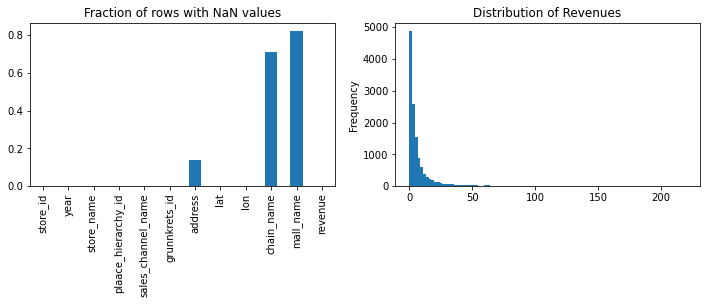

In [ ]:
#simple data EDA
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
stores_train.isna().mean().plot.bar(ax=ax1)
ax1.set_title('Fraction of rows with NaN values')
stores_train.revenue.plot.hist(bins=100, ax=ax2)
ax2.set_title('Distribution of Revenues');

In [ ]:
#very simple training model with h2o
x = stores_train_hf.columns
y = 'revenue'
x.remove(y)

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame= stores_train_hf) 


AutoML progress: |
00:32:42.5: _train param, Dropping bad and constant columns: [store_id, year, store_name]

███
00:33:01.364: _train param, Dropping bad and constant columns: [store_id, year, store_name]

███████

In [ ]:

lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
best_model = aml.get_best_model()

lb


model_id,rmse,mse,mae,rmsle,mean_residual_deviance,algo
StackedEnsemble_BestOfFamily_1_AutoML_2_20221109_01247,9.93139,98.6324,4.82436,0.805381,98.6324,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20221109_01247,9.94073,98.8181,4.81605,0.802846,98.8181,StackedEnsemble
GBM_1_AutoML_2_20221109_01247,10.2976,106.04,4.9594,nan,106.04,GBM
DRF_1_AutoML_2_20221109_01247,10.2978,106.045,4.86387,0.800614,106.045,DRF
GBM_3_AutoML_2_20221109_01247,10.32,106.502,4.92686,nan,106.502,GBM
GBM_2_AutoML_2_20221109_01247,10.3259,106.624,4.89573,nan,106.624,GBM
GBM_5_AutoML_2_20221109_01247,10.3859,107.867,4.90232,nan,107.867,GBM
XGBoost_3_AutoML_2_20221109_01247,10.4161,108.496,5.07741,nan,108.496,XGBoost
GBM_4_AutoML_2_20221109_01247,10.638,113.167,4.99763,nan,113.167,GBM
XGBoost_2_AutoML_2_20221109_01247,10.7179,114.873,5.28991,nan,114.873,XGBoost


In [ ]:
aml.get_best

In [ ]:
m = h2o.get_model(lb[2,"model_id"])
print(m.varimp(use_pandas=True))


                variable  relative_importance  scaled_importance  percentage
0             chain_name         8.526417e+06           1.000000    0.685670
1      municipality_name         2.243723e+06           0.263150    0.180434
2    plaace_hierarchy_id         4.590948e+05           0.053844    0.036919
3              mall_name         3.578620e+05           0.041971    0.028778
4                    lv4         1.772232e+05           0.020785    0.014252
..                   ...                  ...                ...         ...
121               age_85         0.000000e+00           0.000000    0.000000
122                  lv1         0.000000e+00           0.000000    0.000000
123             lv1_desc         0.000000e+00           0.000000    0.000000
124                  lv2         0.000000e+00           0.000000    0.000000
125                  lv3         0.000000e+00           0.000000    0.000000

[126 rows x 4 columns]


In [ ]:
prediction = aml.leader.predict(stores_test_hf)
df = stores_test_hf.cbind(prediction)
df = df.as_data_frame(use_pandas=True)
result = df.loc[:,("store_id", 'predict')]
submission = result.rename(columns = {"store_id": "id", "predict": "predicted"})
submission.to_csv("h2o_with_stores_train_only.csv", index = False)

submission